https://github.com/amarinderthind/RNA-seq-tutorial-for-gene-differential-expression-analysis

In [1]:
#BiocManager::install("DESeq2")
BiocManager::install("edgeR")
BiocManager::install("biomaRt")
BiocManager::install('PCAtools')

Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.3 (2020-10-10)

Installing package(s) 'edgeR'




The downloaded binary packages are in
	/var/folders/z4/zq1sx9z918l822zf41yhflvr0000gn/T//RtmpXt0EH1/downloaded_packages


Old packages: 'KernSmooth', 'codetools', 'nlme'

Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.3 (2020-10-10)

Installing package(s) 'biomaRt'




The downloaded binary packages are in
	/var/folders/z4/zq1sx9z918l822zf41yhflvr0000gn/T//RtmpXt0EH1/downloaded_packages


Old packages: 'KernSmooth', 'codetools', 'nlme'

Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.3 (2020-10-10)

Installing package(s) 'PCAtools'

also installing the dependencies ‘rhdf5filters’, ‘rhdf5’, ‘Rhdf5lib’, ‘sparseMatrixStats’, ‘HDF5Array’, ‘irlba’, ‘rsvd’, ‘sitmo’, ‘cowplot’, ‘DelayedMatrixStats’, ‘BiocSingular’, ‘dqrng’, ‘beachmat’





The downloaded binary packages are in
	/var/folders/z4/zq1sx9z918l822zf41yhflvr0000gn/T//RtmpXt0EH1/downloaded_packages


Old packages: 'KernSmooth', 'codetools', 'nlme'



In [2]:
library(edgeR)
library(DESeq2)
library("biomaRt")

Loading required package: limma

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
   

In [26]:
#load the raw count matrix
setwd("/Users/sdeshpande/Desktop/gene_analysis/RNA-seq-tutorial-for-gene-differential-expression-analysis/") #Path_to_working_directory

rawcount<-read.table ("RawGeneCounts.tsv",header=TRUE,  sep="\t",  row.names=1)

In [27]:
#Filter for coding genes (In case want to filter non-coding Genes)
mart <- useMart(biomart="ensembl", dataset="hsapiens_gene_ensembl")
all_coding_genes <- getBM(attributes = c( "hgnc_symbol"), filters = c("biotype"), values = list(biotype="protein_coding"), mart = mart)
rawcount <- rawcount[row.names(rawcount) %in%  all_coding_genes$hgnc_symbol,]

In [28]:
#Data annotation
anno <-read.table ("Annotation_of_samples.csv",header=TRUE,  sep=",") ##In this case Two coulmns (a) sample (b) Condition
rownames(anno) <- anno$sample

# Define conditions (for contrast) that you want to compare if you have more than one #control #case
# This is pair-wise comparison, so only consider one pair at one time

firstC<-"case1"       #case1 #case2 #case3 etc          
SecondC <-"Control"     
p.threshold <- 0.05   ##define threshold for filtering


### subset raw and conditional data for defined pairs

anno <- anno[(anno$Condition ==firstC |anno$Condition ==SecondC),]
rawcount <- rawcount[,names(rawcount) %in% anno$sample]

In [29]:
rawcount

,sample_1,sample_2,sample_3,sample_4,sample_10,sample_12,sample_13,sample_14,sample_15,sample_16,sample_17,sample_18,sample_19,sample_21,sample_23,sample_25,sample_26,sample_27,sample_28
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TSPAN6,1654,844,1353,1082,408,1560,922,646,1516,3890,167,832,704,853,863,3136,1888,2013,293
DPM1,1978,761,2874,1122,935,925,977,1928,1439,2688,434,1156,439,1042,2024,2217,2379,3499,358
SCYL3,1546,933,736,684,330,805,1350,597,648,1718,342,634,1074,311,466,1078,861,1933,795
C1orf112,1191,864,586,727,233,766,495,347,604,693,120,181,1172,232,214,996,435,644,199
FGR,470,240,349,378,181,346,221,155,188,96,176,194,435,103,148,4354,99,478,195
CFH,5894,4548,6958,2263,506,3058,5260,2836,654,14685,2286,2108,1123,2405,1596,9058,1905,4783,1702
FUCA2,3297,1698,2303,1443,1852,2497,2176,1720,880,3912,917,652,752,1391,2167,15435,2906,1300,336
GCLC,7218,1467,2901,1933,1399,656,2002,2290,3384,6112,676,1689,926,2643,3223,2326,25759,8037,1389
NFYA,1582,2206,2366,1493,2028,2084,2353,960,1576,2143,476,1077,881,948,2467,3426,2325,2467,790


In [30]:
#Create DESeq2 datasets

dds <- DESeqDataSetFromMatrix(countData = rawcount, colData = anno, design = ~Condition )

## Run DESEQ2
dds <- DESeq(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 32 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [31]:
#contrast based  comparison
#In case of multiple comparisons ## we need to change the contrast for every comparision
contrast<- c("Condition",firstC,SecondC)

res <- results(dds, contrast=contrast)
res$threshold <- as.logical(res$padj < p.threshold)  #Threshold defined earlier

nam <- paste('down_in',firstC, sep = '_')
#res$nam <- as.logical(res$log2FoldChange < 0)
res[, nam] <- as.logical(res$log2FoldChange < 0)

genes.deseq <- row.names(res)[which(res$threshold)]

genes_deseq2_sig <- res[which(res$threshold),]

file <- paste('Deseq2_',firstC,'_v_',SecondC,'_results_significant_padj0.05.csv',sep = '')
all_results <- paste('Deseq2_',firstC,'_v_',SecondC,'_all_results.csv',sep = '')

write.table(genes_deseq2_sig,file,sep = ",")
write.table(res,all_results,sep = ",")

In [10]:
all_results

[1] "Deseq2_case1_v_Control_all_results.csv"

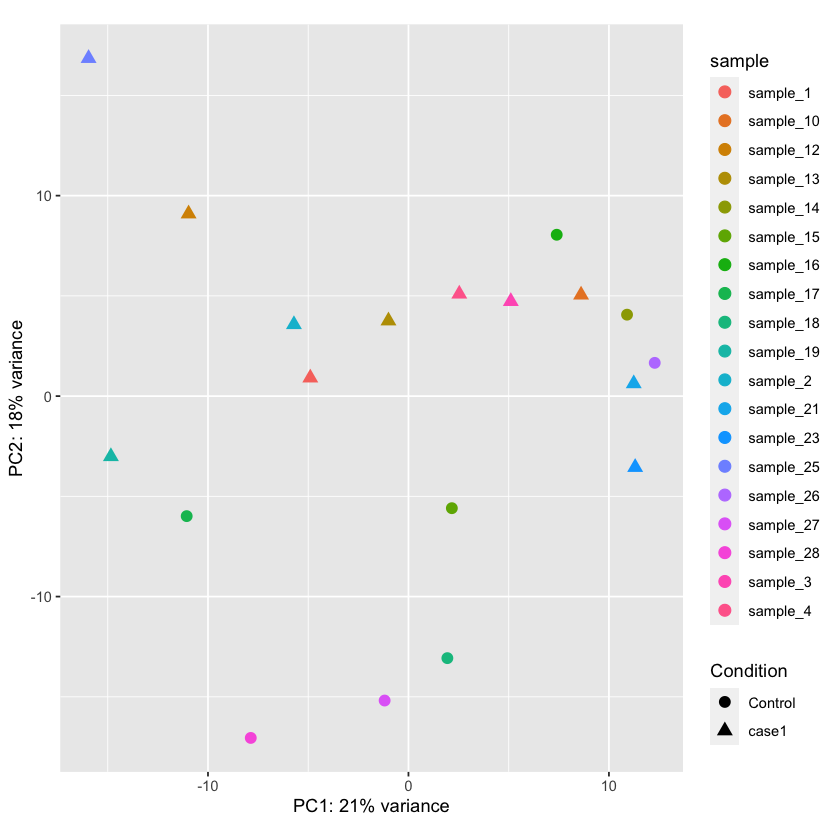

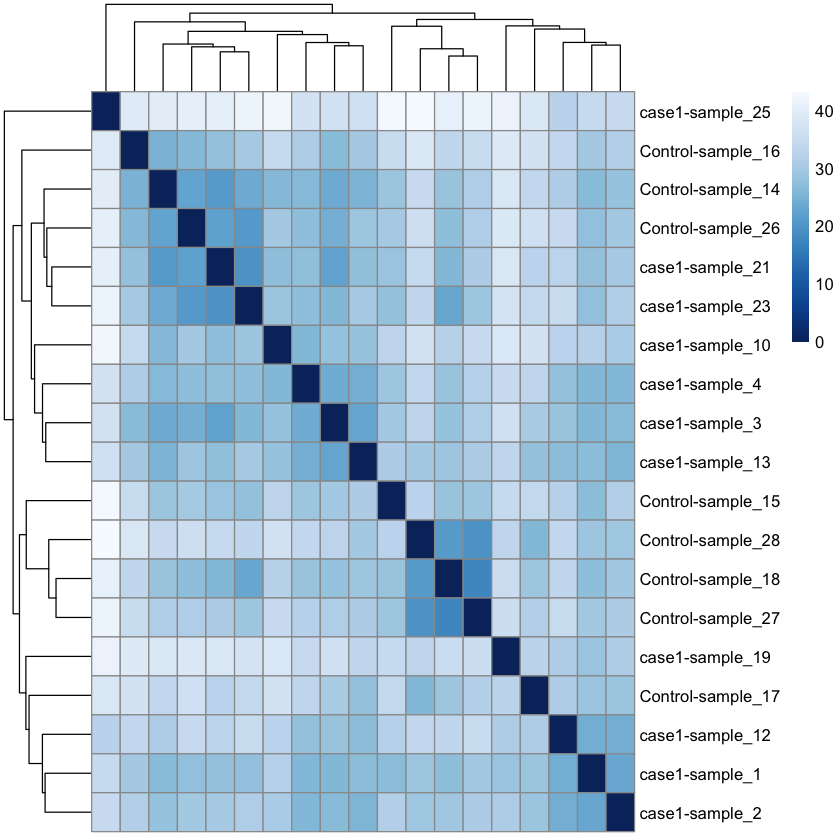

In [9]:
#PCA and Heat-MAp Plots
## Varinace transformation vst or rlog
vsd <- vst(dds, blind=FALSE)   #Variance type (a) Vst or (b) rlog
#rld <- rlog(dds, blind=FALSE) 

library(ggplot2)
###### PCA with design consideration ###
pcaData <- plotPCA(vsd, intgroup=c("Condition", "sample"), returnData=TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
ggplot(pcaData, aes(PC1, PC2, color=sample, shape=Condition)) +
  geom_point(size=3) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) + 
  coord_fixed()

##heatmap
sampleDists <- dist(t(assay(vsd)))
library("RColorBrewer")
library('pheatmap')
sampleDistMatrix <- as.matrix(sampleDists)

rownames(sampleDistMatrix) <- paste(vsd$Condition, vsd$sample, sep="-")

colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

Loading required package: ggrepel


Attaching package: ‘PCAtools’


The following objects are masked from ‘package:stats’:

    biplot, screeplot


-- removing the lower 10% of variables based on variance

-- variables retained:

COL17A1, LTF, ROS1, FAR2, NEXMIF, CP, TSPAN32, PTPRN, SERPINB3, CLCA4, ZIC2, PRSS3, GAL, NGEF, PROM1, MGST1, DDX3Y, KDM5D, ZFY



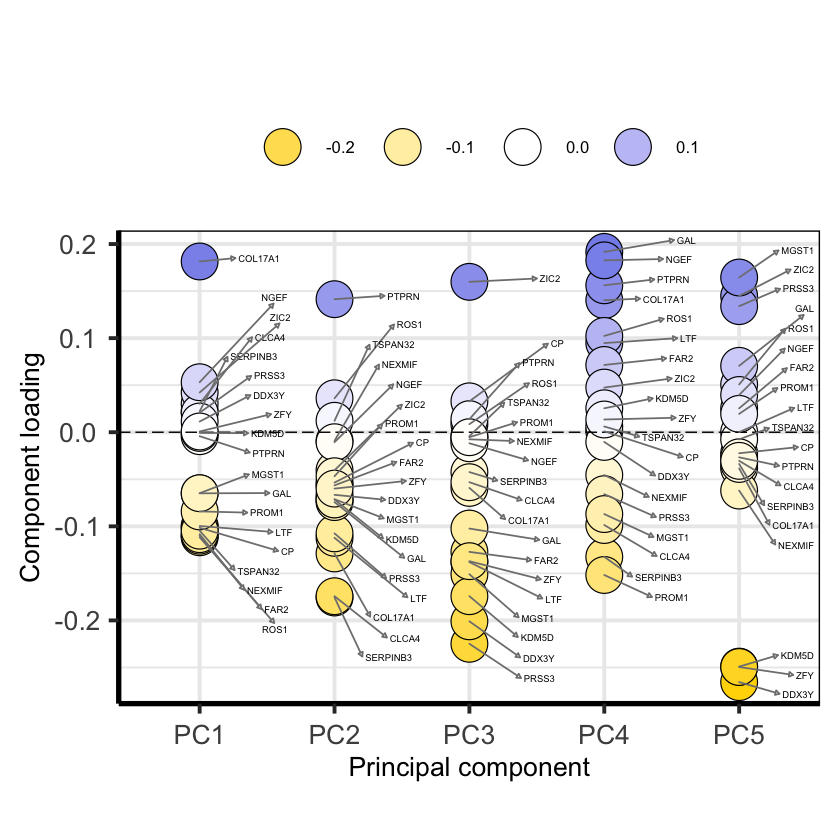

,Control,case1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0
10,1,0


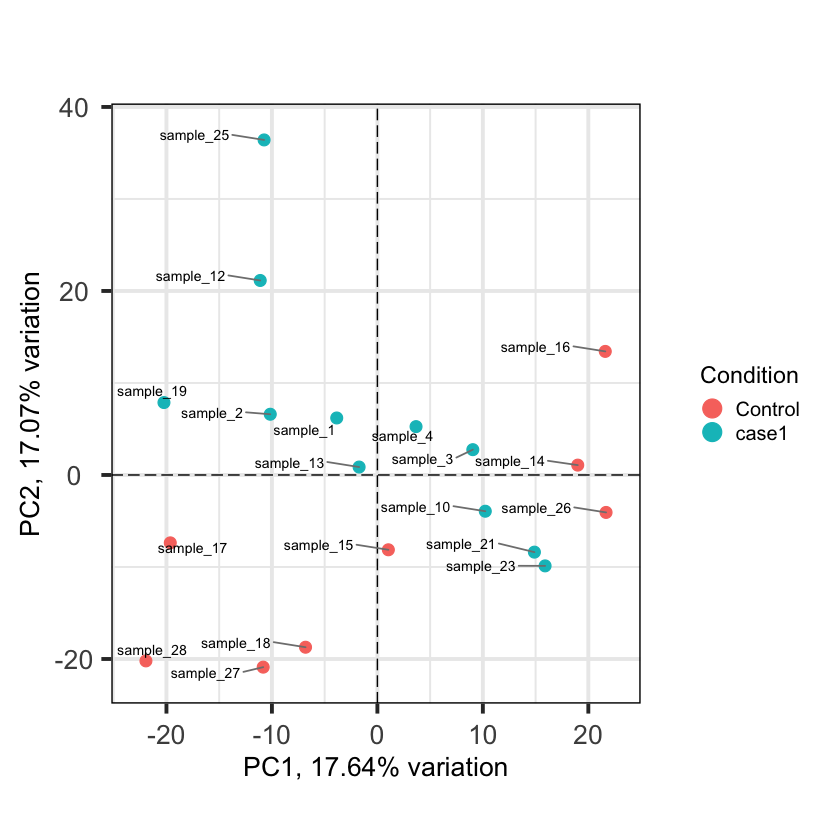

In [11]:
# edgeR
dge <- DGEList(counts=rawcount, group=anno$Condition)

# Normalize by total count
dge <- calcNormFactors(dge, method = "TMM")

# filter out lowly expressed genes
keep <- filterByExpr(dge)
dge <- dge[keep,,keep.lib.sizes=FALSE]  # It is recommended to recalculate the library sizes of the DGEList object after the filtering, although the downstream analysis is robust to whether this is done or not.

# You can also filter the expression matrix based on the treatment factors of scientific interest 
#keep <- filterByExpr(y, group=Condition)


## PCA ## for more details, please visit following link
##https://bioconductor.org/packages/release/bioc/vignettes/PCAtools/inst/doc/PCAtools.html
library(PCAtools)

cpmlog <- cpm(dge, log = TRUE, prior.count = 1)

p <-pca(cpmlog, metadata = anno, removeVar = 0.1) ## -- removing the lower 10% of variables based on variance
#biplot(p)
plotloadings(p)
 
biplot(p,
       lab = paste0(p$metadata$sample),
       colby = 'Condition',
       hline = 0, vline = 0,
       legendPosition = 'right')


# Create the contrast matrix
design.mat <- model.matrix(~ 0 + dge$samples$group)
colnames(design.mat) <- levels(dge$samples$group)
design.mat

# Estimate dispersion parameter for GLM
dge <- estimateGLMCommonDisp(dge, design.mat)
dge <- estimateGLMTrendedDisp(dge, design.mat) 
dge<- estimateGLMTagwiseDisp(dge,design.mat)
# Plot mean-variance
#plotBCV(dge)


# Model fitting 
##  EdgeR glmLRT vs glmQLFTest ## https://support.bioconductor.org/p/84291/

##  both of the methods will work for your data set, the QL F-test is probably the better choice. 
##There are some situations where the QL F-test doesn't work well - for example, if you don't have replicates,
##you'd have to supply a fixed dispersion, which defeats the whole point of modelling estimation uncertainty.
##Another situation is where the dispersions are very large and the counts are very small, whereby some of the approximations in the QL framework seem to fail.

fit.edgeR <- glmQLFit(dge, design.mat)  #glmFit

# Differential expression

contrasts.edgeR <- makeContrasts(case1 - Control, levels=design.mat)    ##FirstC-SecondC ##Define 

qlf.edgeR <-glmQLFTest(fit.edgeR, contrast=contrasts.edgeR)  # glmLRT

##### DGE at padjust 0.05

# Access results tables
edgeR_results <- qlf.edgeR$table
sig.edgeR <- decideTestsDGE(qlf.edgeR, adjust.method="BH", p.value = p.threshold)
#View(sig.edgeR) 
significant_table <- edgeR_results[which(sig.edgeR != 0),]
significant_table$gene <- row.names(significant_table)
genes.edgeR <- row.names(edgeR_results)[which(sig.edgeR != 0)]

edgeR_results$genes <- row.names(edgeR_results)


file_sigTab <- paste('edgeR_',firstC,'_v_',SecondC,'_results_significant_padj0.05.csv',sep = '')
file_allRes <- paste('edgeR_',firstC,'_v_',SecondC,'_all_results.csv',sep = '')

write.table(significant_table,file_sigTab,sep = ",")
write.table(edgeR_results,file_allRes,sep = ",")


Attaching package: ‘gplots’


The following object is masked from ‘package:IRanges’:

    space


The following object is masked from ‘package:S4Vectors’:

    space


The following object is masked from ‘package:stats’:

    lowess




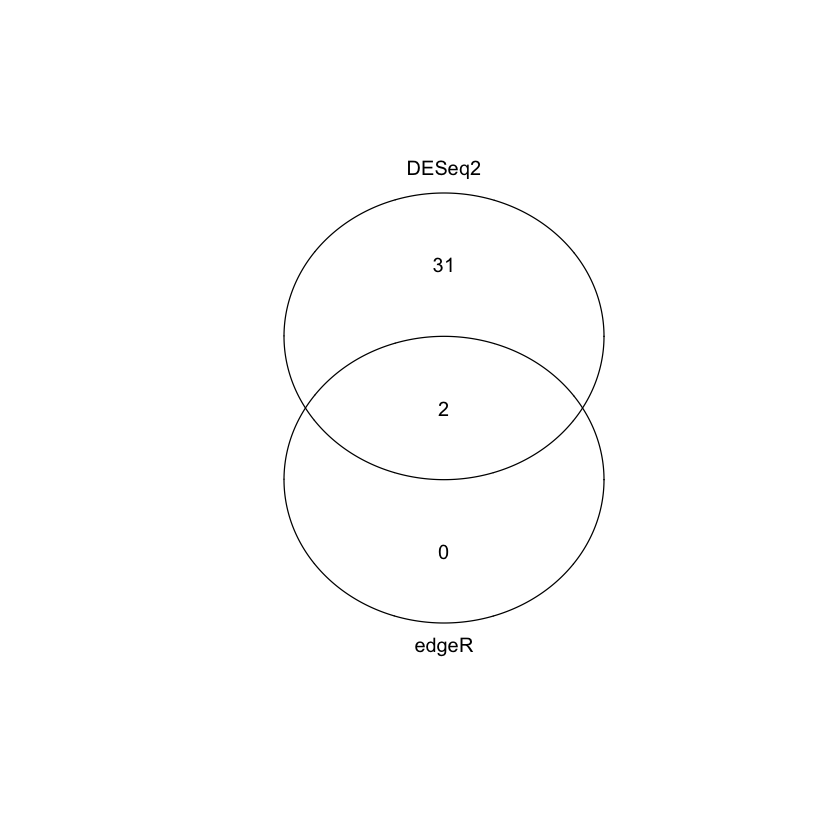

In [12]:
# Overlapped genes between deseq2 and edgeR  

library(gplots)

venn(list(edgeR = genes.edgeR, DESeq2 = genes.deseq))
overlapped_genes <- intersect(genes.deseq,genes.edgeR)


file_common <- paste('Common_DEG_deseq2_edgeR_',firstC,'_v_',SecondC,'.csv',sep = '')
write.table(overlapped_genes,file_common,sep = ",", row.names = F)

https://support.bioconductor.org/p/p132470/#p132485

In [21]:
# options(download.file.method = "curl")
# BiocManager::install("reactome.db")

In [22]:
install.packages("/Users/sdeshpande/Desktop/gene_analysis/reactome.db_1.74.0.tar.gz", repos = NULL, type = "source")

In [23]:
BiocManager::install("ReactomePA")

Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.3 (2020-10-10)

Installing package(s) 'ReactomePA'

Warning message:
“unable to access index for repository https://bioconductor.org/packages/3.12/data/annotation/bin/macosx/contrib/4.0:
  Found continuation line starting '    <script type="te ...' at begin of record.”
Warning message:
“unable to access index for repository https://bioconductor.org/packages/3.12/data/experiment/bin/macosx/contrib/4.0:
  Found continuation line starting '    <script type="te ...' at begin of record.”
Warning message:
“unable to access index for repository https://bioconductor.org/packages/3.12/workflows/bin/macosx/contrib/4.0:
  Found continuation line starting '    <script type="te ...' at begin of record.”



The downloaded binary packages are in
	/var/folders/z4/zq1sx9z918l822zf41yhflvr0000gn/T//RtmpXt0EH1/downloaded_packages


Old packages: 'KernSmooth', 'codetools', 'nlme'



In [34]:
# Quick enrichment analysis 
library(ReactomePA)

#all <- overlapped_genes   ## retreive EntrezGene id's - no mapping for overlapped genes

all <- genes.deseq

genes=getBM(attributes = c("hgnc_symbol", "entrezgene_id"), filters = "hgnc_symbol", values = all, bmHeader = T, mart = mart)

genes1 <- genes$`NCBI gene (formerly Entrezgene) ID` 

#?enrichPathway #pvalueCutoff=0.02, #pAdjustMethod = "BH", qvalueCutoff = 0.01,
x <- enrichPathway(gene=genes1,  pvalueCutoff=0.05,readable=T)

In [38]:
x

#
# over-representation test
#
#...@organism 	 human 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:33] "6296" "416" "586" "1951" "1301" "23604" "84649" "56204" ...
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...0 enriched terms found
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


Warning message in rep(yes, length.out = len):
“'x' is NULL so the result will be NULL”
ERROR while rich displaying an object: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_cont

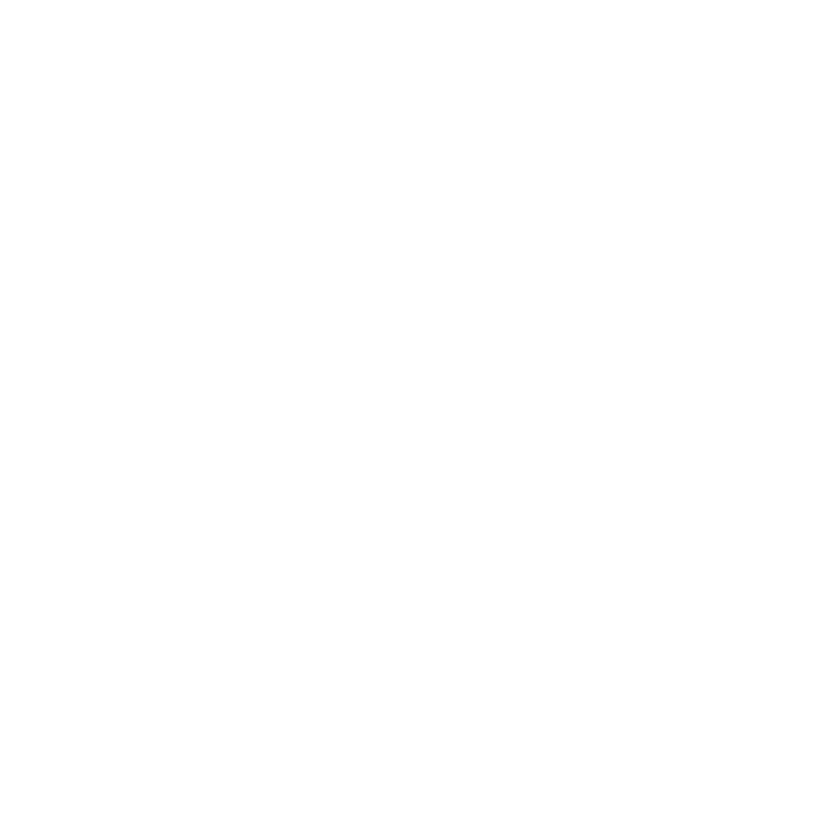

In [42]:
#head(as.data.frame(x))
#barplot(x, showCategory=10)
#dotplot(x, showCategory=10)
#emapplot(x)
#cnetplot(x, categorySize="pvalue", foldChange=genes1)
#emapplot(x, color="pvalue")
#viewPathway("Extracellular matrix organization", readable=TRUE, foldChange=genes1)   ## it's an example